In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install gensim

In [102]:
df = pd.read_csv('/kaggle/input/simps/data.csv')
df = df.dropna()
df.head()

,Unnamed: 0,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,0,10368,35,29,"Lisa Simpson: Maggie, look. What's that?",235000,True,9,5.0,Lisa Simpson,Simpson Home,"Maggie, look. What's that?",maggie look whats that,4.0
1,1,10369,35,30,Lisa Simpson: Lee-mur. Lee-mur.,237000,True,9,5.0,Lisa Simpson,Simpson Home,Lee-mur. Lee-mur.,lee-mur lee-mur,2.0
2,2,10370,35,31,Lisa Simpson: Zee-boo. Zee-boo.,239000,True,9,5.0,Lisa Simpson,Simpson Home,Zee-boo. Zee-boo.,zee-boo zee-boo,2.0
3,3,10372,35,33,Lisa Simpson: I'm trying to teach Maggie that ...,245000,True,9,5.0,Lisa Simpson,Simpson Home,I'm trying to teach Maggie that nature doesn't...,im trying to teach maggie that nature doesnt e...,24.0
4,4,10374,35,35,"Lisa Simpson: It's like an ox, only it has a h...",254000,True,9,5.0,Lisa Simpson,Simpson Home,"It's like an ox, only it has a hump and a dewl...",its like an ox only it has a hump and a dewlap...,18.0


### Создадим корпус слов из всех фраз персонажей

In [103]:
phrases = df['normalized_text'].tolist()

In [105]:
text = [x.split() for x in phrases]

In [106]:
text[:5]

[['maggie', 'look', 'whats', 'that'],
 ['lee-mur', 'lee-mur'],
 ['zee-boo', 'zee-boo'],
 ['im',
  'trying',
  'to',
  'teach',
  'maggie',
  'that',
  'nature',
  'doesnt',
  'end',
  'with',
  'the',
  'barnyard',
  'i',
  'want',
  'her',
  'to',
  'have',
  'all',
  'the',
  'advantages',
  'that',
  'i',
  'didnt',
  'have'],
 ['its',
  'like',
  'an',
  'ox',
  'only',
  'it',
  'has',
  'a',
  'hump',
  'and',
  'a',
  'dewlap',
  'hump',
  'and',
  'dew-lap',
  'hump',
  'and',
  'dew-lap']]

### Обучим модель Word2Vec на полученном корпусе

In [114]:
from gensim.models import Word2Vec

In [119]:
model = Word2Vec(min_count=1)
model.build_vocab(text)
model.train(text, total_examples=model.corpus_count, epochs=100)

(7694546, 10045000)

### Визуализируем эмбеддинги самых частотных слов 

In [37]:
from sklearn.manifold import TSNE

In [52]:
def tsne_plot_top_n(n):
    top_n_words = model.wv.index_to_key[:n]
    labels = []
    tokens = []

    for word in top_n_words:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tokens = np.array(tokens)   
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

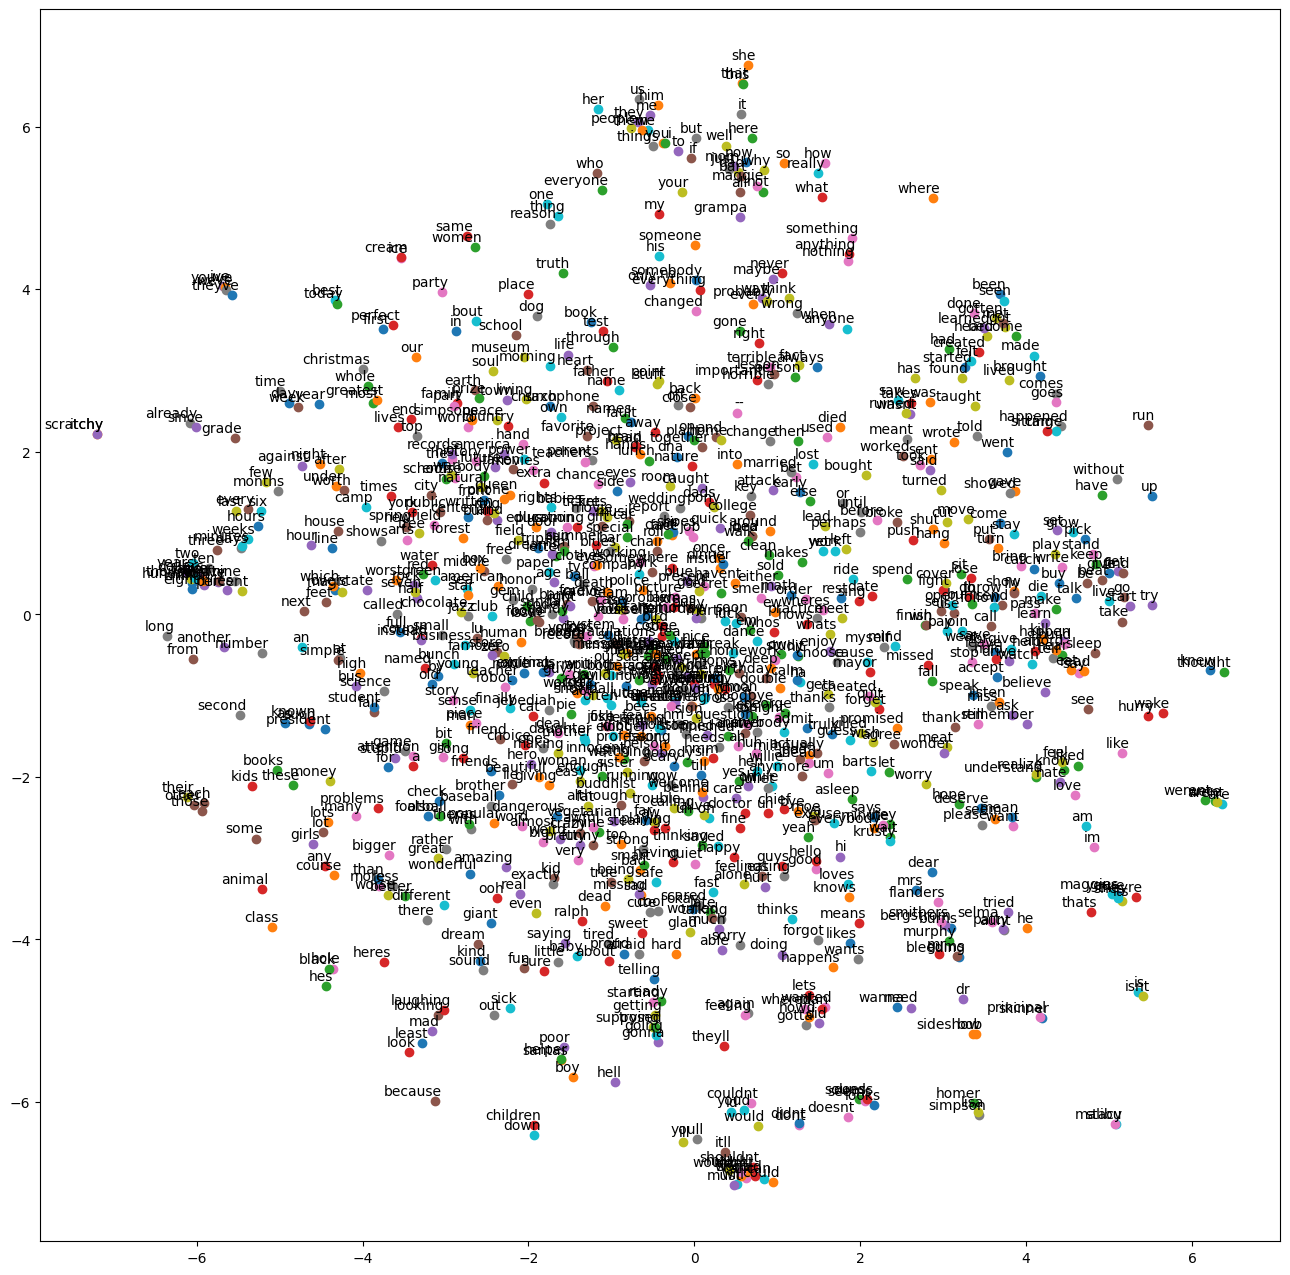

In [127]:
tsne_plot_top_n(1000)

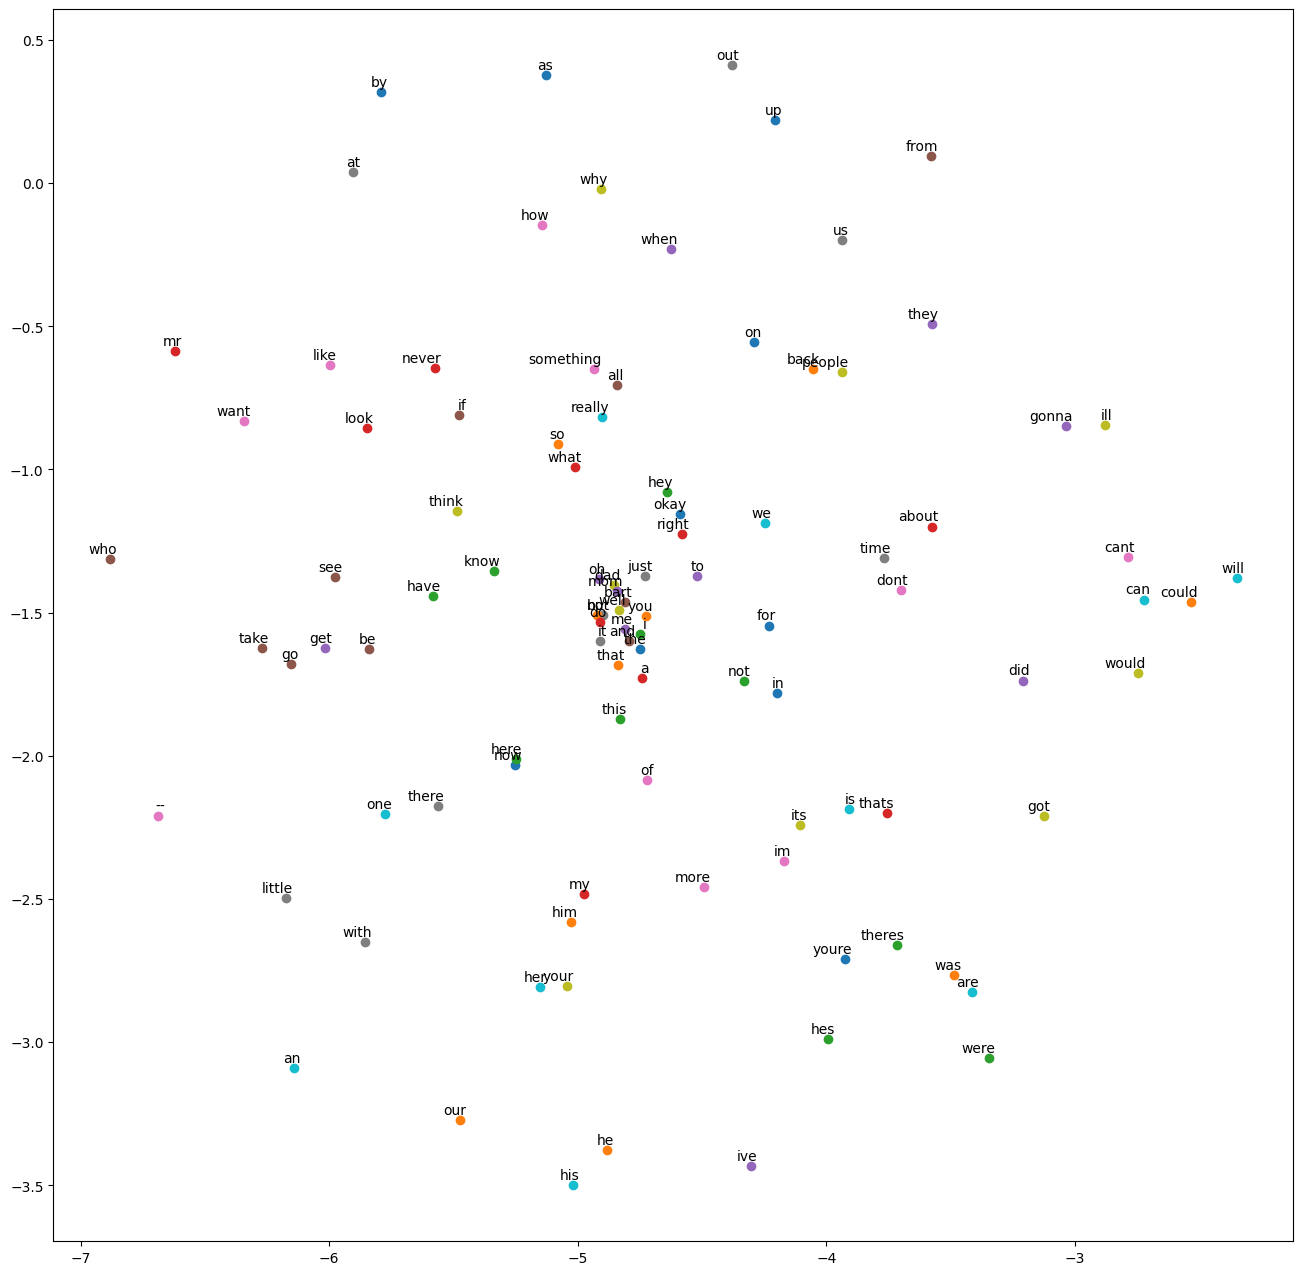

In [128]:
tsne_plot_top_n(100)

### Найдем самые близкие слова для некоторых примеров

In [124]:
#homer - marge + bart
model.wv.most_similar(positive=['homer', 'bart'], negative=['marge'])[0]

('dad', 0.624492347240448)

In [125]:
#bart - lisa + school
model.wv.most_similar(positive=['bart', 'school'], negative=['lisa'])[0]

('dad', 0.5008679628372192)

In [126]:
#marge - homer + home
model.wv.most_similar(positive=['marge', 'home'], negative=['homer'])[0]

('self-actualized', 0.44805777072906494)